In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_roc_curve, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Task 2

In [2]:
df = pd.read_csv('sgn.csv')

In [3]:
def sgn(m, model):
    plt.close()
    sns.scatterplot(x=df['x'], y=df['y'], s=3)
    global df1
    df1 = df.copy()
    for i in range(m):
        df1[f'sin{i+1}']=np.sin(df['x']*i)
        df1[f'cos{i+1}']=np.cos(df['x']*i)
    X = df1.iloc[:,2:]
    y = df1['y']
    model.fit(X,y)
    print(model.coef_)
    print(model.intercept_)
    
    y_pred = model.predict(X)
    
    sns.lineplot(x=df['x'], y=y_pred, color = 'Red')

In [4]:
reg = LinearRegression()
lasso = LassoCV()

[0. 0.]
-0.0044526341156887386


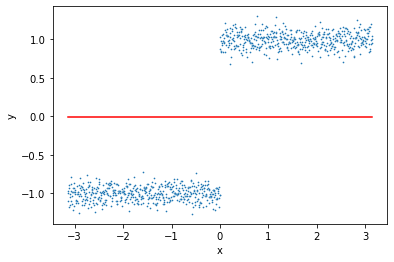

In [5]:
sgn(1, reg)

[ 0.00000000e+00  2.16623594e-16  1.26491679e+00  1.52178093e-03
  2.62664126e-04  1.22063343e-03  4.25026998e-01 -6.30254496e-03
 -3.80589168e-03 -3.55254045e-03]
-0.0044550829726979855


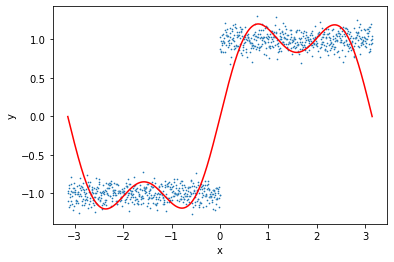

In [6]:
sgn(5, reg)

[-2.39851995e+12  1.22842539e+14  1.26803859e+00  3.75219746e-02
  2.62246082e-04 -1.40844746e-02  4.25118081e-01 -1.32592754e-02
 -3.55657415e-03 -1.01782246e-02  2.58190478e-01 -1.54052540e-03
  1.59743120e-03  5.44677540e-03  1.89628106e-01 -1.32592754e-02
 -2.63963625e-03  1.54052540e-03  1.40325475e-01 -5.44677540e-03
  1.69857299e-03  4.95009078e-03  1.22753121e-01 -2.44813408e-02
 -6.70758414e-03  5.44677540e-03  1.01307313e-01 -5.44677540e-03
 -7.71182095e-03  1.32592754e-02  8.51542754e-02 -1.54052540e-03
  5.97199950e-03  8.85634078e-03  7.75505590e-02 -4.45340615e-03
  1.38951178e-03  1.22659062e-02  7.57761552e-02 -1.32592754e-02]
-122842538951626.55


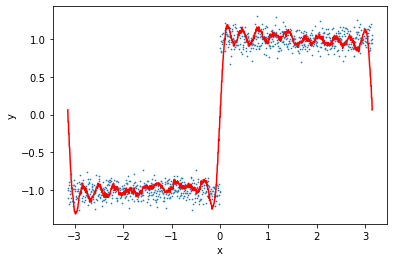

In [7]:
sgn(20, reg)

[-2.86041594e+11  2.37913662e+13  1.26831055e+00  3.51562500e-02
  2.77860744e-04  2.09980814e-03  4.24995694e-01 -9.40703369e-03
 -3.76503854e-03  1.49767431e-04  2.57351285e-01 -3.12058988e-03
  2.59151210e-03  6.40776027e-03  1.89049993e-01 -3.17923128e-03
 -1.60120541e-03 -5.40964712e-04  1.40091447e-01 -6.17171829e-03
  1.91605285e-03 -4.89724488e-03  1.22256080e-01 -8.76593496e-03
 -5.56123963e-03 -5.25789679e-03  1.00617855e-01  1.91013403e-03
 -5.35067210e-03 -9.36198060e-04  8.42720812e-02  6.73902684e-04
  7.13099035e-03  2.04611323e-03  7.43513555e-02  4.74967194e-03
  2.95401317e-03 -1.86941393e-04  7.39700751e-02 -5.44968534e-03
  2.02436596e-03  1.46847875e-03  5.94943443e-02 -6.05433278e-03
 -4.80090034e-04  5.52612824e-03  5.39056390e-02 -4.41285739e-03
  1.14725552e-03  5.25296002e-03  5.35808251e-02 -1.04217774e-03
 -5.07243014e-03 -5.07398738e-03  4.76972651e-02 -9.29975057e-04
 -7.06116586e-03  4.02144968e-03  4.74864144e-02 -1.33993910e-03
  3.39704897e-03 -4.48208

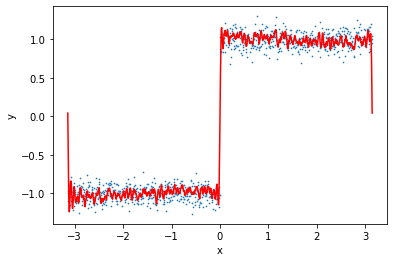

In [8]:
sgn(100, reg)

[-1.93133029e+08 -1.39363394e+08  3.64764331e+09 ... -1.19380048e+08
  7.81544533e+09  0.00000000e+00]
139363393.8881998


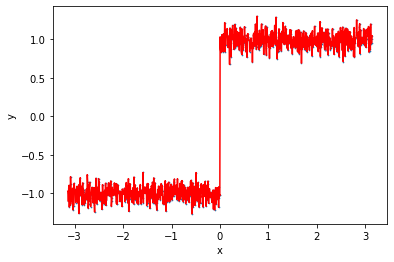

In [9]:
sgn(1000, reg)

## Task 3

[ 0.          0.          1.16231549 ... -0.          0.
  0.        ]
-0.004452634115688679


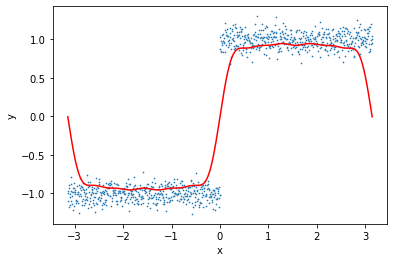

In [10]:
sgn(1000, lasso)

Как видим, Lasso труднее переобучить, чем обычную линейную регрессию без регуляризации

## Task 4

In [11]:
df = pd.read_csv("../Bonus19/BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A","Luminal B"])]
X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=17
)

In [13]:
svm = SVC(kernel="linear", C=0.01)
svm.fit(X_train, y_train); pass

Balanced accuracy score: 0.8652647975077882
[[96  7]
 [11 35]]
TPR: 0.932 TNR: 0.761


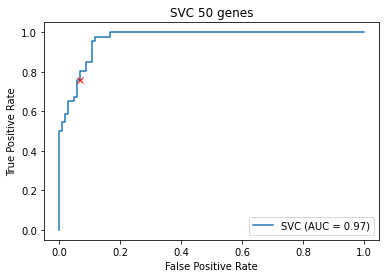

In [14]:
y_pred = svm.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(svm, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")
plt.title("SVC 50 genes")
plt.show()

In [15]:
coef = np.argsort(np.abs(svm.coef_[0]))[-2:]
X = df.iloc[:, coef].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=17
)
svm.fit(X_train, y_train); pass

Balanced accuracy score: 0.8316636308439587
[[99  4]
 [23 23]]
TPR: 0.961 TNR: 0.5


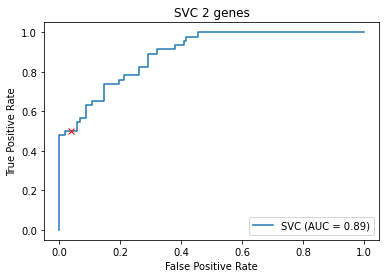

In [16]:
y_pred = svm.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(svm, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")
plt.title("SVC 2 genes")
plt.show()

[[ 0.          0.          0.          0.          0.          0.
   0.27090443  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.36144112  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Balanced accuracy score: 0.7992673992673993
[[80 23]
 [ 4 42]]
TPR: 0.777 TNR: 0.913


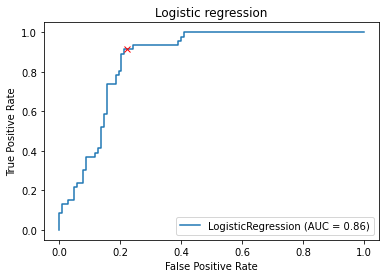

In [17]:
X = df.iloc[:, :-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=17
)

log = LogisticRegression(class_weight = 'balanced', C=0.01, penalty='l1', solver='liblinear')
log.fit(X_train, y_train)
print(log.coef_)
y_pred = log.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(log, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")
plt.title("Logistic regression")
plt.show()